# Isco Alarcon
Data visualisation of Isco's passes vs Iran

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pandas.io.json import json_normalize
from FCPython import createPitch
%matplotlib inline

In [2]:
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

#Mens World Cup 2019 has competition ID 43
competition_id=43

#ID for Spain vs Iran
match_id_required = 7543

In [3]:
# Load in the data
file_name=str(match_id_required)+'.json'

#Load in all match events 
with open('Statsbomb/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

In [5]:
#Convert data into a dataframe
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])
print(df.head())

                                     id  index  period     timestamp  minute  \
0  606ffdd7-e662-44fc-8b74-597e52bccd34      1       1  00:00:00.000       0   
1  de846eee-d58f-4d07-9f53-4cac479d9780      2       1  00:00:00.000       0   
2  4d21580e-e409-489f-951d-8cc4d988846c      3       1  00:00:00.000       0   
3  16438f10-bff1-4a74-a727-4dc13d6397a8      4       1  00:00:00.000       0   
4  0a0dd7a4-b32d-4f09-8fc1-c09fa3c8fcc2      5       1  00:00:03.773       0   

   second  possession  duration  type_id    type_name  ...  \
0       0           1     0.000       35  Starting XI  ...   
1       0           1     0.000       35  Starting XI  ...   
2       0           1       NaN       18   Half Start  ...   
3       0           1     9.400       18   Half Start  ...   
4       3           2     0.999       30         Pass  ...   

   clearance_aerial_won pass_deflected  shot_aerial_won  \
0                   NaN            NaN              NaN   
1                   NaN     

In [11]:
#Filter by passes by Spain
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')  
spain_passes = passes.loc[passes['team_name'] == "Spain"]
print(spain_passes.head())

                                      index  period     timestamp  minute  \
id                                                                          
0a0dd7a4-b32d-4f09-8fc1-c09fa3c8fcc2      5       1  00:00:03.773       0   
6777df18-43ac-4337-9701-da4c82b0976e      8       1  00:00:05.133       0   
0d0541f2-de18-44a1-9681-4edc691c99fe     11       1  00:00:06.840       0   
74d68edb-6508-4f60-87e5-685c4fbe48ce     15       1  00:00:09.253       0   
ed21325a-602a-442b-a701-ef0883ac8e53     18       1  00:00:12.453       0   

                                      second  possession  duration  type_id  \
id                                                                            
0a0dd7a4-b32d-4f09-8fc1-c09fa3c8fcc2       3           2     0.999       30   
6777df18-43ac-4337-9701-da4c82b0976e       5           2     0.840       30   
0d0541f2-de18-44a1-9681-4edc691c99fe       6           2     0.653       30   
74d68edb-6508-4f60-87e5-685c4fbe48ce       9           2     1.68

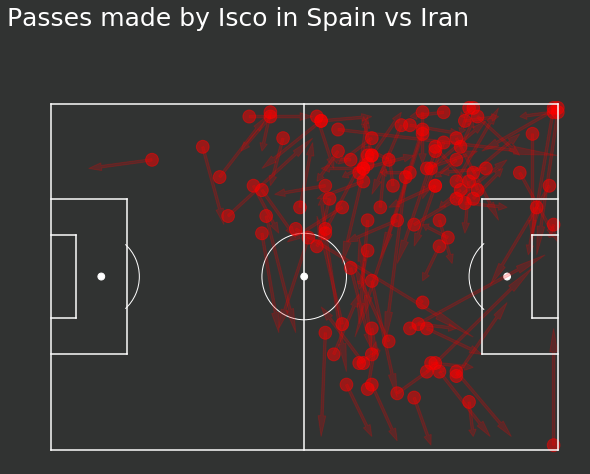

In [10]:
background = "#313332"

(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','w')

fig.set_facecolor(background)
ax.patch.set_facecolor(background)
fig.text(0.1, 1, "Passes made by Isco in Spain vs Iran", color='w', fontsize=25)

#Plot Isco passes
for i,passs in spain_passes.iterrows():
    if passs['player_name']=='Francisco Román Alarcón Suárez':
        x_start=passs['location'][0]
        y_start=passs['location'][1]
        x_end=passs['pass_end_location'][0]
        y_end=passs['pass_end_location'][1]
        
        circleSize=1.5
    
        passCircle=plt.Circle((x_start,pitchWidthY-y_start),circleSize,color="red")
        passCircle.set_alpha(.5)
        ax.add_patch(passCircle)
        
        passArrow=plt.Arrow(x_start, pitchWidthY-y_start, x_end-x_start, y_start-y_end, width=3, color="red")
        passArrow.set_alpha(.2)
        ax.add_patch(passArrow)
     
fig.set_size_inches(10, 7)
plt.show()